In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore")


In [17]:
df = pd.read_csv(r"C:\Users\rauna\Students' performance ml\notebook\data\stud.csv")

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [19]:
x = df.drop(columns=["math_score"], axis=1)
x

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [22]:
y = df["math_score"]
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [31]:
num_feature = x.select_dtypes(exclude="object").columns
cat_feature = x.select_dtypes(include="object").columns

from sklearn.compose import ColumnTransformer

scaler = StandardScaler()
onehot_encoder = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("One Hot Encoder", onehot_encoder, cat_feature),
        ("Standard Scaler", scaler, num_feature)
    ]
)

In [32]:
x = preprocessor.fit_transform(x)

In [33]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42,)

In [47]:
def metrics(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true,predicted)
    r2 = r2_score(true, predicted)
    return mse, mae, r2

In [48]:
models = {
    "Linear Regression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "SVR" : SVR(),
    "DecisionTree Regressor" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "CatBoost Regressor" : CatBoostRegressor(verbose=False)
    
}
model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mse,model_train_mae,model_train_r2_score = metrics(y_train,y_train_pred)
    model_test_mse,model_test_mae,model_test_r2_score = metrics(y_test,y_test_pred)

    print(list(models.keys())[i])

    model_list.append(list(models.keys())[i])

    print("Model Training Performance")
    print(f"r2_score : {model_train_r2_score}")
    print(f"Mean Squared Error : {model_train_mse}")
    print(f"Mean Absolute Error : {model_train_mae}")

    print("------------------------------------")

    print("Model Test Performance")
    print(f"r2_score : {model_test_r2_score}")
    print(f"Mean Squared Error : {model_test_mse}")
    print(f"Mean Absolute Error : {model_test_mae}")
    r2_list.append(model_test_r2_score)

    print("="*35)
    print("\n")



Linear Regression
Model Training Performance
r2_score : 0.8741224947715269
Mean Squared Error : 28.37876708984375
Mean Absolute Error : 4.2784375
------------------------------------
Model Test Performance
r2_score : 0.879689103789915
Mean Squared Error : 29.276260986328126
Mean Absolute Error : 4.227890625


Ridge
Model Training Performance
r2_score : 0.8743042615212909
Mean Squared Error : 28.337788233082446
Mean Absolute Error : 4.26498782372598
------------------------------------
Model Test Performance
r2_score : 0.8805931485028738
Mean Squared Error : 29.056272192348278
Mean Absolute Error : 4.211100688014259


Lasso
Model Training Performance
r2_score : 0.8071462015863458
Mean Squared Error : 43.47840400585578
Mean Absolute Error : 5.206302661246526
------------------------------------
Model Test Performance
r2_score : 0.8253197323627852
Mean Squared Error : 42.50641683841162
Mean Absolute Error : 5.157881810347763


K-Neighbors Regressor
Model Training Performance
r2_score : 0.

In [50]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=["Model Names","R2_Test_Score"]).sort_values(by=["R2_Test_Score"], ascending=False)

,Model Names,R2_Test_Score
1,Ridge,0.880593
0,Linear Regression,0.879689
7,Gradient Boosting Regressor,0.872540
10,CatBoost Regressor,0.851632
6,Random Forest Regressor,0.847137
8,AdaBoost Regressor,0.843033
9,XGB Regressor,0.827797
2,Lasso,0.825320
3,K-Neighbors Regressor,0.783898
5,DecisionTree Regressor,0.734218


In [51]:
lr = LinearRegression(fit_intercept=True)
lr = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.97


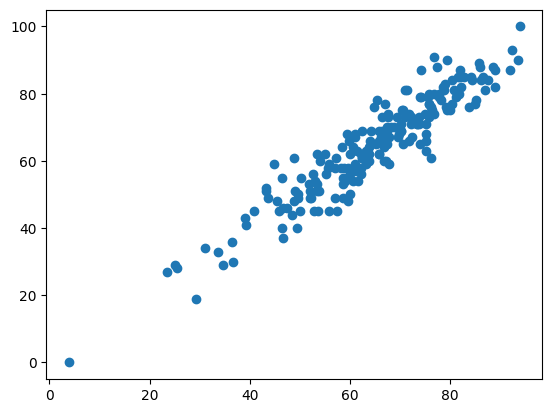

In [56]:
plt.scatter(y_pred,y_test)

<Axes: xlabel='math_score'>

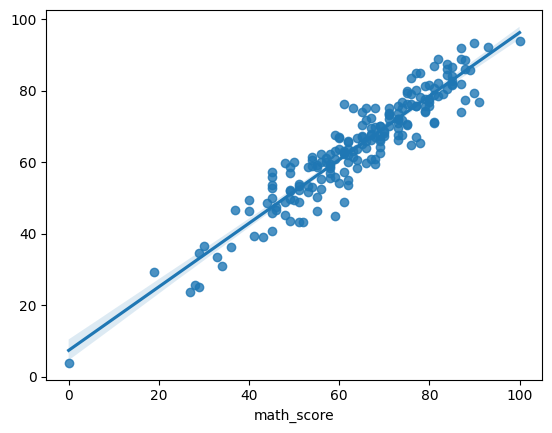

In [59]:
sns.regplot(x= y_test, y= y_pred)

In [60]:
pred_df = pd.DataFrame({"Acutal Value":y_test,"Predicted Value":y_pred, "Difference": y_test-y_pred})
pred_df

,Acutal Value,Predicted Value,Difference
521,91,76.734375,14.265625
737,53,58.593750,-5.593750
740,80,76.843750,3.156250
660,74,76.750000,-2.750000
411,84,87.500000,-3.500000
...,...,...,...
408,52,43.156250,8.843750
332,62,62.125000,-0.125000
208,74,67.578125,6.421875
613,65,67.343750,-2.343750
